In [1]:
#This is just a branch test
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

In [2]:
#LIFE EXPECTANCY
#Read annual working hours per worker on the world
WH_data = pd.read_csv('data/annual-working-hours-per-worker.csv')
WH_data.head()

,Entity,Code,Year,Average annual working hours per worker
0,Argentina,ARG,1950,2034.0000
1,Argentina,ARG,1951,2037.8667
2,Argentina,ARG,1952,2041.7408
3,Argentina,ARG,1953,2045.6223
4,Argentina,ARG,1954,2049.5112


In [3]:
WH_data["Code"].value_counts()

CHE    75
DEU    75
ITA    75
CAN    75
ESP    75
       ..
ZAF    17
JAM    17
TTO    12
BRB    11
NGA     8
Name: Code, Length: 71, dtype: int64

In [4]:
filt=(WH_data["Code"]=='USA')
WH_USA_df=WH_data[filt]
WH_USA_df.head()

,Entity,Code,Year,Average annual working hours per worker
3263,United States,USA,1870,3096.0
3264,United States,USA,1880,3044.0
3265,United States,USA,1890,2983.0
3266,United States,USA,1900,2938.0
3267,United States,USA,1913,2900.0


In [5]:
WH_USA_df.shape

(75, 4)

In [6]:
#Read life expectancy on the world
LE_data = pd.read_csv('data/life-expectancy.csv')
LE_data.head()

,Entity,Code,Year,Life expectancy
0,Afghanistan,AFG,1950,27.638
1,Afghanistan,AFG,1951,27.878
2,Afghanistan,AFG,1952,28.361
3,Afghanistan,AFG,1953,28.852
4,Afghanistan,AFG,1954,29.350


In [7]:
filt=(LE_data["Code"]=='USA')
LE_USA_df=LE_data[filt]
LE_USA_df.head()

,Entity,Code,Year,Life expectancy
17980,United States,USA,1880,39.410000
17981,United States,USA,1890,45.209999
17982,United States,USA,1901,49.299999
17983,United States,USA,1902,50.500000
17984,United States,USA,1903,50.599998


In [8]:
LE_USA_df.shape

(121, 4)

In [9]:
data_combined_df=pd.merge(WH_USA_df, LE_USA_df, how="outer", on="Year")
data_combined_df.dropna(inplace=True)
data_combined_df

,Entity_x,Code_x,Year,Average annual working hours per worker,Entity_y,Code_y,Life expectancy
1,United States,USA,1880,3044.0000,United States,USA,39.410000
2,United States,USA,1890,2983.0000,United States,USA,45.209999
4,United States,USA,1913,2900.0000,United States,USA,53.500000
5,United States,USA,1929,2316.0000,United States,USA,58.500000
6,United States,USA,1938,1756.0000,United States,USA,62.389999
...,...,...,...,...,...,...,...
70,United States,USA,2013,1750.0786,United States,USA,78.909000
71,United States,USA,2014,1754.4224,United States,USA,78.922000
72,United States,USA,2015,1765.1826,United States,USA,78.910000
73,United States,USA,2016,1760.7960,United States,USA,78.885000


In [10]:
list(data_combined_df.columns)

['Entity_x',
 'Code_x',
 'Year',
 'Average annual working hours per worker',
 'Entity_y',
 'Code_y',
 'Life expectancy']

In [11]:
data_combined_df.drop(['Entity_y', 'Code_y'], axis=1, inplace=True)
data_combined_df.rename(columns = {'Entity_x':'Country', 'Code_x':'Country Code'}, inplace = True) 
data_combined_df.head()

,Country,Country Code,Year,Average annual working hours per worker,Life expectancy
1,United States,USA,1880,3044.0,39.410000
2,United States,USA,1890,2983.0,45.209999
4,United States,USA,1913,2900.0,53.500000
5,United States,USA,1929,2316.0,58.500000
6,United States,USA,1938,1756.0,62.389999


In [12]:
data_combined_df.shape

(73, 5)

In [13]:
years=data_combined_df['Year']
work_hours=data_combined_df['Average annual working hours per worker']
life_expectancy=data_combined_df['Life expectancy']

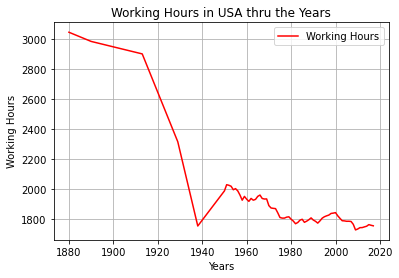

In [18]:
plt.title("Working Hours in USA thru the Years")
plt.ylabel("Working Hours")
plt.xlabel("Years")
plt.plot(years,work_hours, color='red', label="Working Hours")
plt.legend(loc="upper right")
plt.grid()

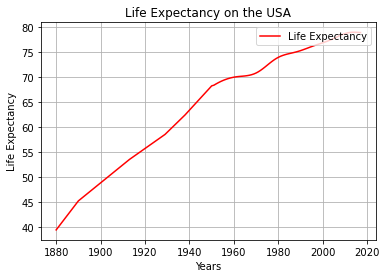

In [19]:
plt.title("Life Expectancy on the USA")
plt.ylabel("Life Expectancy")
plt.xlabel("Years")
plt.plot(years,life_expectancy, color='red', label="Life Expectancy")
plt.legend(loc="upper right")
plt.grid()

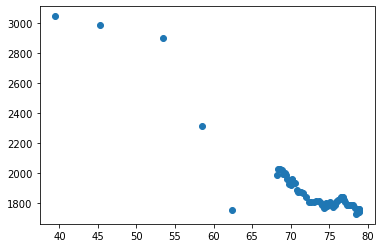

In [20]:
plt.scatter(life_expectancy[:,], work_hours)